In [1]:
import cv2
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../inputs/datasets/body_recognition.csv")

In [3]:
df

,names,urls,paths,GT
0,OK_000000,https://assets.vogue.com/photos/5e5e9a3cc66797...,../inputs/images/People_Yes_resized_640/OK_000...,OK
1,OK_000001,https://assets.vogue.com/photos/5e5e99ef02f19a...,../inputs/images/People_Yes_resized_640/OK_000...,OK
2,OK_000002,https://assets.vogue.com/photos/5e5e9a61b8b636...,../inputs/images/People_Yes_resized_640/OK_000...,OK
3,OK_000003,https://assets.vogue.com/photos/5e5e9a1ea173d7...,../inputs/images/People_Yes_resized_640/OK_000...,OK
4,OK_000004,https://assets.vogue.com/photos/5e5e99f36dd294...,../inputs/images/People_Yes_resized_640/OK_000...,OK
...,...,...,...,...
1160,KO_000565,COCO_Dataset,../inputs/images/People_No/000000523782.jpg,KO
1161,KO_000566,COCO_Dataset,../inputs/images/People_No/000000545407.jpg,KO
1162,KO_000567,COCO_Dataset,../inputs/images/People_No/000000578792.jpg,KO
1163,KO_000568,COCO_Dataset,../inputs/images/People_No/000000523033.jpg,KO


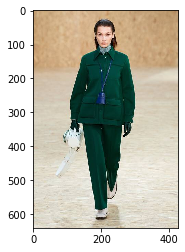

In [4]:
img = cv2.imread("../inputs/images/People_Yes_resized_640/OK_000000.jpg") 
# Reorganize numpy array for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

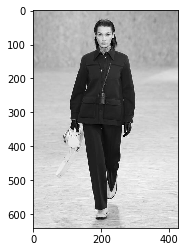

In [5]:
img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_bw,cmap="gray")

In [6]:
img_bw.shape

(640, 427)

In [7]:
def getImgBW(path):
    img = cv2.imread(path) 
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_bw

In [8]:
df["img_bw"]=df.paths.apply(lambda x: getImgBW(x))
df

,names,urls,paths,GT,img_bw
0,OK_000000,https://assets.vogue.com/photos/5e5e9a3cc66797...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[52, 52, 53, 53, 54, 55, 56, 56, 54, 54, 54, ..."
1,OK_000001,https://assets.vogue.com/photos/5e5e99ef02f19a...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[49, 51, 54, 58, 58, 62, 69, 77, 94, 117, 136..."
2,OK_000002,https://assets.vogue.com/photos/5e5e9a61b8b636...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[52, 59, 60, 59, 65, 69, 68, 67, 65, 64, 64, ..."
3,OK_000003,https://assets.vogue.com/photos/5e5e9a1ea173d7...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, ..."
4,OK_000004,https://assets.vogue.com/photos/5e5e99f36dd294...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[104, 104, 104, 104, 104, 103, 103, 103, 107,..."
...,...,...,...,...,...
1160,KO_000565,COCO_Dataset,../inputs/images/People_No/000000523782.jpg,KO,"[[96, 95, 97, 96, 99, 94, 103, 97, 98, 94, 96,..."
1161,KO_000566,COCO_Dataset,../inputs/images/People_No/000000545407.jpg,KO,"[[159, 163, 164, 162, 160, 162, 164, 166, 164,..."
1162,KO_000567,COCO_Dataset,../inputs/images/People_No/000000578792.jpg,KO,"[[6, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
1163,KO_000568,COCO_Dataset,../inputs/images/People_No/000000523033.jpg,KO,"[[217, 216, 216, 216, 217, 217, 217, 218, 217,..."


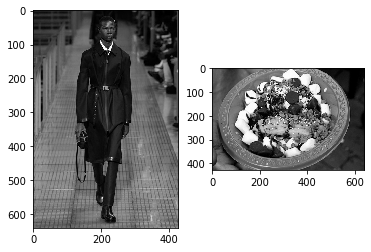

In [9]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'img_bw'],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(df.loc[1077,'img_bw'],cmap="gray")

In [10]:
from scipy.fftpack import dct

In [11]:
numfeats = 65
def getFeats(img):
    try:
        fft = np.log10(np.abs(np.fft.fft2(img)))
        w = fft.shape[0]//2
        fft = fft[3:w+3,3:w+3]
        feats = fft[:numfeats,:numfeats]
        q = np.hstack(feats)
        if len(q) != numfeats*numfeats:
            plt.imshow(img)
            print("Invalid face to get features")
            return None
        return q
    except:
        print("Cannot extract features")
        return None

In [12]:
feats = getFeats(img_bw)
print(feats)
print(feats.shape)

[5.51190973 5.65786955 5.85338344 ... 3.82972117 3.88715277 3.51811468]
(4225,)


In [13]:
df["feats"]=df.img_bw.apply(lambda x: getFeats(x))

In [14]:
df

,names,urls,paths,GT,img_bw,feats
0,OK_000000,https://assets.vogue.com/photos/5e5e9a3cc66797...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[52, 52, 53, 53, 54, 55, 56, 56, 54, 54, 54, ...","[5.13300207575066, 5.081125175408285, 5.463776..."
1,OK_000001,https://assets.vogue.com/photos/5e5e99ef02f19a...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[49, 51, 54, 58, 58, 62, 69, 77, 94, 117, 136...","[5.735312168904858, 5.967902827759415, 5.91577..."
2,OK_000002,https://assets.vogue.com/photos/5e5e9a61b8b636...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[52, 59, 60, 59, 65, 69, 68, 67, 65, 64, 64, ...","[6.0419077492825775, 5.594070398302869, 5.8060..."
3,OK_000003,https://assets.vogue.com/photos/5e5e9a1ea173d7...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, ...","[5.39708530703897, 5.511896840527888, 5.532205..."
4,OK_000004,https://assets.vogue.com/photos/5e5e99f36dd294...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[104, 104, 104, 104, 104, 103, 103, 103, 107,...","[5.738794719580734, 5.611660904562183, 5.77136..."
...,...,...,...,...,...,...
1160,KO_000565,COCO_Dataset,../inputs/images/People_No/000000523782.jpg,KO,"[[96, 95, 97, 96, 99, 94, 103, 97, 98, 94, 96,...","[5.688295073356087, 5.495329137529233, 5.49446..."
1161,KO_000566,COCO_Dataset,../inputs/images/People_No/000000545407.jpg,KO,"[[159, 163, 164, 162, 160, 162, 164, 166, 164,...","[4.82826630831949, 4.841623960351729, 5.135248..."
1162,KO_000567,COCO_Dataset,../inputs/images/People_No/000000578792.jpg,KO,"[[6, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.548053762153189, 5.471626765280449, 5.26480..."
1163,KO_000568,COCO_Dataset,../inputs/images/People_No/000000523033.jpg,KO,"[[217, 216, 216, 216, 217, 217, 217, 218, 217,...","[5.349367040600045, 5.4450479802150955, 5.3756..."


In [15]:
df = df[~df["feats"].isnull()]

In [16]:
X = df.feats
y = df.GT

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from scipy.spatial.distance import cosine

def getPrediction(vect):
    try:
        diffs = X_train.apply(lambda x: cosine(x,vect))
        #print(diffs)
        #print("---------")
        predictIndex = diffs.sort_values(ascending=True).index[0]
        #print(predictIndex)
        #print("---------")
        gt = df.iloc[predictIndex].GT
        #print(gt)
        #print("---------")
        return gt
    except:
        return "Cannot recognize"

In [19]:
df.iloc[0].GT

'OK'

In [20]:
getPrediction(df.loc[1,'feats'])

'OK'

In [21]:
res1 = pd.DataFrame({
    "GT":y_test,
    "prediction": X_test.apply(lambda x: getPrediction(x))
})

In [22]:
res1 = res1.reset_index()
res1

,index,GT,prediction
0,401,OK,OK
1,1143,KO,KO
2,886,KO,KO
3,620,KO,KO
4,38,OK,KO
...,...,...,...
228,1046,KO,KO
229,928,KO,KO
230,747,KO,KO
231,852,KO,KO


In [23]:
res=[]
for ind in range(len(res1.GT)):
    if res1.loc[ind,'GT'] == res1.loc[ind,'prediction']:
        res.append("ACIERTA")
    else:
        res.append("NO ACIERTA")
        
res1["res"]=res

In [24]:
aciertos = res1.res[res1.res == "ACIERTA"].value_counts()

In [25]:
ind_acierto = aciertos/len(res1.res)

In [26]:
ind_acierto

ACIERTA    0.755365
Name: res, dtype: float64

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

first_model = HistGradientBoostingClassifier(learning_rate=0.8, max_depth=50, min_samples_leaf=260)

XX = np.vstack(X_train)
print(XX.shape)
first_model.fit(XX, y_train)

XXT = np.vstack(X_test)
print(XXT.shape)
y_pred = first_model.predict(XXT)

(932, 4225)
(233, 4225)


In [28]:
res_2 = pd.DataFrame({
    "GT":y_test,
    "prediction":y_pred
})

In [29]:
res_2 = res_2.reset_index()

In [30]:
res_2

,index,GT,prediction
0,401,OK,KO
1,1143,KO,KO
2,886,KO,KO
3,620,KO,KO
4,38,OK,OK
...,...,...,...
228,1046,KO,KO
229,928,KO,KO
230,747,KO,OK
231,852,KO,KO


In [31]:
res2=[]
for ind in range(len(res_2.GT)):
    if res_2.loc[ind,'GT'] == res_2.loc[ind,'prediction']:
        res2.append("ACIERTA")
    else:
        res2.append("NO ACIERTA")
        
res_2["res"]=res2

In [32]:
aciertos = res_2.res[res_2.res == "ACIERTA"].value_counts()
ind_acierto = aciertos/len(res_2.res)
ind_acierto

ACIERTA    0.772532
Name: res, dtype: float64

In [89]:
import imutils
from imutils import perspective
from imutils import contours

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

def checkPicture(path):
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_bw = cv2.GaussianBlur(img_bw, (7, 7), 1)
    
    edged = cv2.Canny(img_bw, 50, 100)
    edged = cv2.dilate(edged, None, iterations=1)
    edged = cv2.erode(edged, None, iterations=1)
    plt.figure()
    plt.imshow(edged,cmap="gray")
    
    # find contours in the edge map
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    # sort the contours from left-to-right and initialize the
    # 'pixels per metric' calibration variable
    (cnts, _) = contours.sort_contours(cnts)
    lst=[]
    for ind,c in enumerate(cnts):
        lst.append([ind,cv2.contourArea(c)])
    lst.sort(key=lambda lst: lst[1], reverse=True)
    c = cnts[lst[0][0]]
    
    # compute the rotated bounding box of the contour
    orig = img.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding box

    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
    
    
    # unpack the ordered bounding box, then compute the midpoint
    # between the top-left and top-right coordinates, followed by
    # the midpoint between bottom-left and bottom-right coordinates
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)

    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    # draw the midpoints on the image
    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

    # draw lines between the midpoints
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
    plt.figure()
    plt.imshow(orig)
    
    print("Esta foto está:",first_model.predict([getFeats(img_bw)]))
    plt.figure(figsize=(7,9))
    #plt.imshow(cnts[lst[0][0]])

Esta foto está: ['OK']


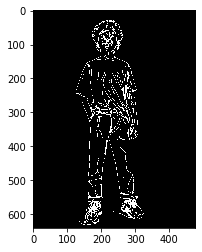

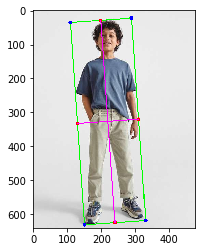

<Figure size 504x648 with 0 Axes>

In [90]:
checkPicture("../inputs/images/Posture_Yes/modelo3.jpg")

Esta foto está: ['OK']


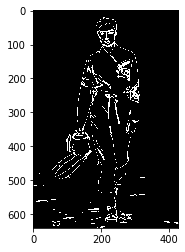

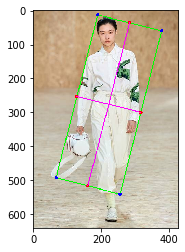

<Figure size 504x648 with 0 Axes>

In [91]:
checkPicture("../inputs/images/People_Yes_resized_640/OK_000008.jpg")